# **Understanding Neural Network From Scratch**

In [ ]:
#Dataset

#A
a=[0,0,1,1,0,0,
   0,1,0,0,1,0,
   1,1,1,1,1,1,
   1,0,0,0,0,1,
   1,0,0,0,0,1]

#B
b=[0,1,1,1,0,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0]

#C
c=[0,1,1,1,1,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,1,1,1,0]

In [ ]:
#creating labels
y=[[1,0,0],
   [0,1,0],
   [0,0,1]]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

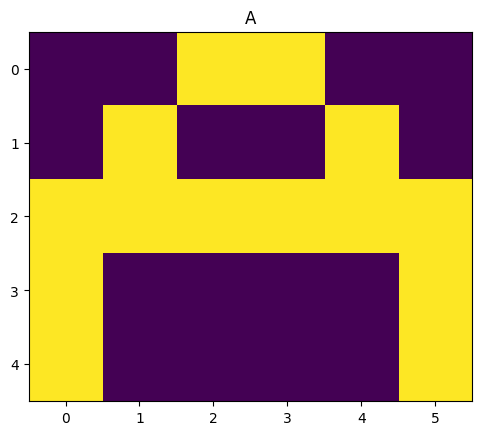

In [ ]:
#Visualize data
plt.imshow(np.array(a).reshape(5,6))
plt.title('A')
plt.show()

In [ ]:
#convert data and labels into np array
x=[np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y=np.array(y)
print(x,"\n\n",y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
#input(1,30)
#hidden(1,5)
#output(3,3)

In [ ]:
#activation function
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
#creating feed forward NN
def f_forward(x,w1,w2):
  #hidden layer
  z1=x.dot(w1)
  a1=sigmoid(z1)

  #output layer
  z2=a1.dot(w2)
  a2=sigmoid(z2)
  return(a2)


In [ ]:
#initialize weights
def generate_wt(x,y):
  l=[]
  for i in range(x*y):
    l.append(np.random.randn())
  return np.array(l).reshape(x,y)


In [ ]:
def loss(out, Y):
  s=(np.square(out-Y))
  s=np.sum(s)/len(y)
  return(s)

In [ ]:
def back_prop(x,y,w1,w2,alpha):
  #hidden layer
  z1=x.dot(w1)
  a1=sigmoid(z1)

  #output layer
  z2=a1.dot(w2)
  a2=sigmoid(z2)

  d2=(a2-y)
  d1 = np.multiply(d2.dot(w2.transpose()), np.multiply(a1, 1-a1))

  #gradient
  w1_adj = x.transpose().dot(d1)
  w2_adj = a1.transpose().dot(d2)
  w1=w1-(alpha*(w1_adj))
  w2=w2-(alpha*(w2_adj))
  return(w1,w2)

In [ ]:
def train(x,y,w1,w2,alpha=0.01,epoch=10):
  acc=[]
  loss_values=[]
  for j in range(epoch):
    l=[]
    for i in range(len(x)):
      out=f_forward(x[i],w1,w2)
      l.append((loss(out,y[i])))
      w1,w2=back_prop(x[i],y[i],w1,w2,alpha)
    print("Epochs:",j+1,"acc:",(1-(sum(l)/len(x)))*100)
    acc.append((1-(sum(l)/len(x)))*100)
    loss_values.append(sum(l)/len(x))
  return(acc,loss_values,w1,w2)

In [ ]:
def predict(x,w1,w2):
  out=f_forward(x,w1,w2)
  maxm=0
  k=0
  for i in range(len(out[0])):
    if(maxm<out[0][i]):
      maxm=out[0][i]
      k=i
  if(k==0):
    print("Image is of Letter A")
  elif(k==1):
    print("Image is of Letter B")
  else:
    print("Image is of Letter C")
  plt.imshow(x.reshape(5,6))
  plt.show()

In [ ]:
w1=generate_wt(30,5)
w2=generate_wt(5,3)
print(w1 ,"\n\n",w2)

[[ 0.32804395 -0.53434365 -0.70821935 -0.95666655 -1.75241723]
 [-1.07162265 -0.02077673  0.24899909 -0.71979836 -1.2400195 ]
 [-0.81151699 -1.18789496 -0.6175504   1.40057878 -0.4317923 ]
 [ 2.27211087  0.61051756  1.2187217  -0.97134436 -1.59463942]
 [ 1.5169131   0.25364433  1.33032294 -2.00849345  1.12457688]
 [-0.35645328 -1.00570125 -1.15265019  0.1747789   2.14905591]
 [-0.4536641  -0.7337472  -0.27724665  0.61515257 -0.11124263]
 [-0.13889304 -0.09309783 -0.82636162 -2.09042466 -0.53699249]
 [ 1.28211914 -1.51452662  0.18252281  0.32830608  0.42279812]
 [-0.72249155  0.05678309 -0.55643525  1.00484959 -0.8004119 ]
 [-0.34833941 -0.127637    1.30353796 -0.99501091 -0.07688757]
 [-0.67020224 -0.17875344 -0.02255608 -2.12181771 -3.32086192]
 [ 0.7964033  -2.15344004 -0.58572873 -0.76155817  1.04802312]
 [ 0.40397184 -0.09765542 -0.67253416 -0.92360662 -1.28635833]
 [-0.10322069  0.61124596  0.1627895   0.56876057  0.25222389]
 [ 0.20702386 -1.23912911 -1.96233108  0.29041507 -0.60

In [ ]:

acc,loss,w1,w2=train(x,y,w1,w2,0.1,100)


Epochs: 1 acc: 75.66626725373038
Epochs: 2 acc: 76.44676000312907
Epochs: 3 acc: 77.08606489710992
Epochs: 4 acc: 77.62144582324116
Epochs: 5 acc: 78.08153587483146
Epochs: 6 acc: 78.48908066304774
Epochs: 7 acc: 78.86288710598477
Epochs: 8 acc: 79.21921595943266
Epochs: 9 acc: 79.57285158665664
Epochs: 10 acc: 79.93794812930408
Epochs: 11 acc: 80.32851052776708
Epochs: 12 acc: 80.7580019066501
Epochs: 13 acc: 81.23711294633873
Epochs: 14 acc: 81.7687431107747
Epochs: 15 acc: 82.34138729557961
Epochs: 16 acc: 82.92723509294947
Epochs: 17 acc: 83.4924237765635
Epochs: 18 acc: 84.01392925072335
Epochs: 19 acc: 84.48638396477024
Epochs: 20 acc: 84.91553472046094
Epochs: 21 acc: 85.30968328576758
Epochs: 22 acc: 85.67572552810051
Epochs: 23 acc: 86.01863250544542
Epochs: 24 acc: 86.3419991626466
Epochs: 25 acc: 86.64858593763284
Epochs: 26 acc: 86.94064399343308
Epochs: 27 acc: 87.22007838743328
Epochs: 28 acc: 87.48852599946781
Epochs: 29 acc: 87.74739636430337
Epochs: 30 acc: 87.99789869

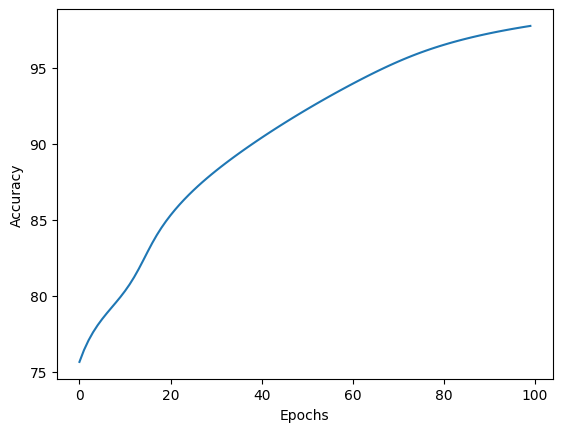

In [ ]:
import matplotlib.pyplot as plt1
plt1.plot(acc)
plt1.ylabel('Accuracy',)
plt1.xlabel("Epochs")
plt1.show()

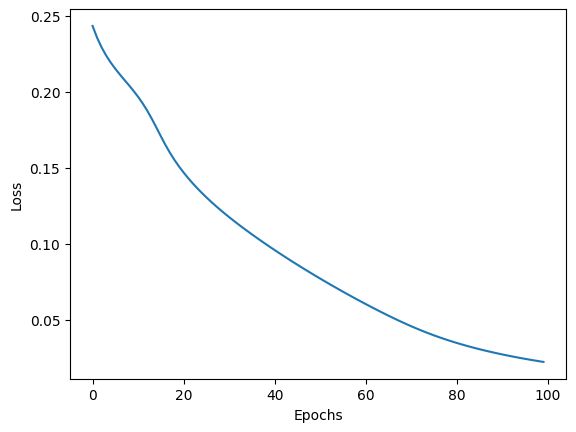

In [ ]:
plt1.plot(loss)
plt1.ylabel('Loss',)
plt1.xlabel("Epochs")
plt1.show()

In [ ]:
print(w1 ,"\n\n",w2)

[[ 0.32804395 -0.53434365 -0.70821935 -0.95666655 -1.75241723]
 [-1.38146794  0.20969695  0.31701868 -0.73387454 -0.71200852]
 [-1.01833345 -1.41866868 -0.81569979  1.44576939 -0.10159928]
 [ 2.06529441  0.37974385  1.02057231 -0.92615374 -1.26444641]
 [ 1.48234084 -0.38173663  1.41754022 -1.98788188  2.23694314]
 [-0.35645328 -1.00570125 -1.15265019  0.1747789   2.14905591]
 [-0.4536641  -0.7337472  -0.27724665  0.61515257 -0.11124263]
 [-0.3457095  -0.32387155 -1.024511   -2.04523405 -0.20679948]
 [ 1.28211914 -1.51452662  0.18252281  0.32830608  0.42279812]
 [-0.72249155  0.05678309 -0.55643525  1.00484959 -0.8004119 ]
 [-0.52058362  0.27697024  1.01817129 -0.97043187 -0.85906082]
 [-0.67020224 -0.17875344 -0.02255608 -2.12181771 -3.32086192]
 [ 0.89943213 -2.61468745 -0.85189771 -0.70229138  0.85020516]
 [ 0.19715538 -0.32842914 -0.87068355 -0.87841601 -0.95616532]
 [-0.2754649   1.0158532  -0.12257717  0.59333961 -0.52994936]
 [ 0.03477966 -0.83452187 -2.24769775  0.31499411 -1.38

Image is of Letter C


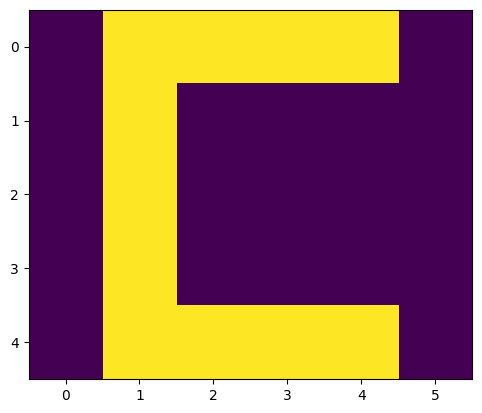

In [ ]:
predict(x[2],w1,w2)